In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

ventas = {
'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
'Ventas (millones)': [1.2, 2.5, 3.1, 18.3, 40.5, 52.1, 54.8, 46.2,
25.5, 13.8, 11.9, 9.2]
}

df_ventas = pd.DataFrame(ventas)
ventas_pp = df_ventas['Ventas (millones)']

print(df_ventas)



           Mes  Ventas (millones)
0        Enero                1.2
1      Febrero                2.5
2        Marzo                3.1
3        Abril               18.3
4         Mayo               40.5
5        Junio               52.1
6        Julio               54.8
7       Agosto               46.2
8   Septiembre               25.5
9      Octubre               13.8
10   Noviembre               11.9
11   Diciembre                9.2
0      1.2
1      2.5
2      3.1
3     18.3
4     40.5
5     52.1
6     54.8
7     46.2
8     25.5
9     13.8
10    11.9
11     9.2
Name: Ventas (millones), dtype: float64


### Objetivos

●​ Calcular la media, la mediana y la moda de las ventas mensuales.  
●​ Comprender la importancia de estas medidas en el análisis de datos de
ventas.  

Ejercicio práctico
Realiza los siguientes cálculos con los datos sobre las ventas mensuales
en unidades del último año:
1.​Calcular la media de las ventas.  
2.​Calcular la mediana de las ventas.  
3.​Calcular la moda de las ventas.  
Interpretá y explicá qué significan estos valores.  
  

In [ ]:
ventas_pp.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12 entries, 0 to 11
Series name: Ventas (millones)
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 228.0 bytes


In [ ]:
ventas_pp.describe()


,Ventas (millones)
count,12.000000
mean,23.258333
std,20.045106
min,1.200000
25%,7.675000
50%,16.050000
75%,41.925000
max,54.800000


## Calculo de medidas de Tendencia Central

In [ ]:
print( ventas_pp)

media = np.mean(ventas_pp)
mediana = np.median(ventas_pp)
moda_result = stats.mode(ventas_pp)

print(f"\nLa media es: {media: .2f}")
print(f"La mediana es: {mediana: .2f}")

if(moda_result[1] > 1):
   print(f"La moda es: {moda_result[0]:.2f}")
else:
   print("NO HAY moda (amodal), porque no hay datos repetidos !")

0      1.2
1      2.5
2      3.1
3     18.3
4     40.5
5     52.1
6     54.8
7     46.2
8     25.5
9     13.8
10    11.9
11     9.2
Name: Ventas (millones), dtype: float64

La media es:  23.26
La mediana es:  16.05
NO HAY moda (amodal), porque no hay datos repetidos !


Otra forma de ver si hay datos repetidos para procesar la moda:

In [ ]:
# Verificar si hay duplicados
hay_duplicados = ventas_pp.duplicated().any()

mensaje = "SI" if hay_duplicados else "NO"
print(f"¿Hay valores duplicados en las ventas ?:=> {mensaje}")

# Contar cuántas veces se repite cada valor (si hay duplicados)
if hay_duplicados:
    conteo_valores = ventas_pp.value_counts()
    print("\nConteo de cada valor:")
    print(conteo_valores)
else:
    print("\nNo hay valores duplicados para contar.")

ventas_pp.value_counts()

¿Hay valores duplicados en las ventas ?:=> NO

No hay valores duplicados para contar.


,count
Ventas (millones),
1.2,1
2.5,1
3.1,1
18.3,1
40.5,1
52.1,1
54.8,1
46.2,1
25.5,1


*   **Media** (23.26 millones):   
    Este es el promedio de ventas mensuales.  
    Nos da una idea general del nivel de ventas a lo largo del año.

*   **Mediana** (16.05 millones):  
    Este es el valor central de las ventas una vez ordenadas.  
    Es menos sensible a valores extremos (como las ventas altas de Mayo, Junio y Julio) que la media, por lo que puede ser una mejor representación de las ventas típicas en este caso.

*   **Moda** (1.20 millones):  
    Esto es un error !!!  NO EXISTE MODA !!!  
    
    En este caso, como no hay duplicados, SciPy devuelve el valor mínimo.  
    Esto resalta la importancia de entender cómo funciona la moda en conjuntos de datos sin repeticiones y que, en este caso particular, la moda no es una medida útil para describir la tendencia central de las ventas.   
      


## Calculo de medidas de Dispersión:

In [ ]:
rango = np.max(ventas_pp) - np.min(ventas_pp)
print(f"El rango es: {rango: .2f}")

varianza = np.var(ventas_pp)
print(f"La varianza es: {varianza: .2f}")

SD = np.std(ventas_pp)
print(f"La desviación estandar es: {SD: .2f}")

El rango es:  53.60
La varianza es:  368.32
La desviación estandar es:  19.19


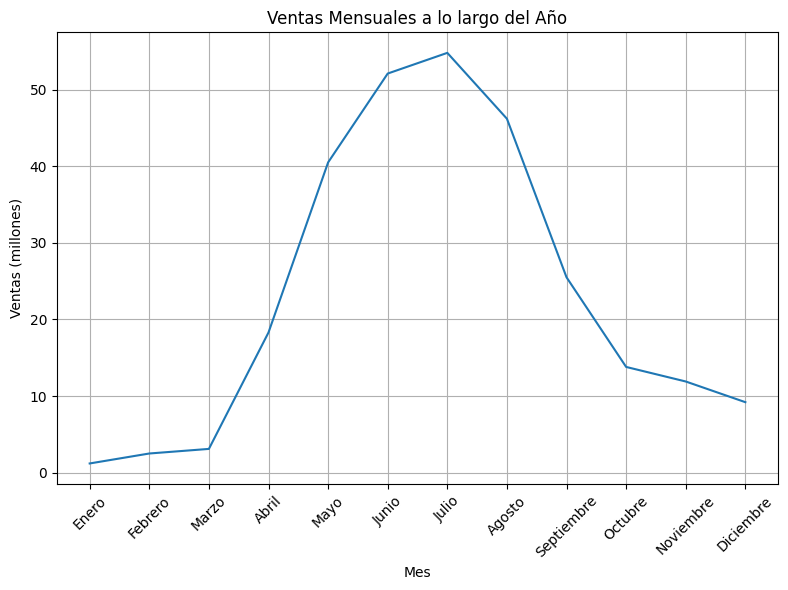

In [40]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_ventas, x='Mes', y='Ventas (millones)')
plt.title('Ventas Mensuales a lo largo del Año')
plt.xlabel('Mes')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Summary of Sales Analysis Findings

Based on the analysis of the monthly sales data:

*   **Measures of Central Tendency:**
    *   The **mean** sales were approximately **23.26 million**. This is the average monthly sales value over the year.
    *   The **mediana** sales were approximately **16.05 million**. This is the middle value when the sales are ordered, and it is less affected by the higher sales in the peak months compared to the mean.
    *   There is **no mode** for this dataset as no sales value is repeated.

*   **Measures of Dispersion:**
    *   The **range** of sales was **53.60 million**, indicating a large difference between the highest and lowest monthly sales.
    *   The **variance** was approximately **368.32**, and the **standard deviation** was approximately **19.19**. These values show a significant spread or variability in the monthly sales data.

*   **Seasonality:**
    *   The line plot clearly shows a strong **seasonal trend**, with sales significantly increasing from May to August and decreasing in other months.
    *   The **highest sales** occurred in **July** (54.8 million), and the **lowest sales** occurred in **January** (1.2 million).
    *   This distinct peak during the May-August period suggests that the product is likely seasonal and its demand is tied to a specific time of the year.

*   **Potential Product Types:**
    *   Considering the strong seasonal peak in May-August, if the data is from the **Northern Hemisphere**, the product could likely be **Bronceador** (sunscreen/tanning lotion).
    *   If the data is from the **Southern Hemisphere**, the product could likely be **Bufandas** (scarves).

Overall, the sales data exhibits a clear seasonal pattern, with a significant peak during the May-August period, which dominates the overall sales trend and influences the central tendency and dispersion measures.

In [41]:
# Find the month with the highest sales
max_sales_month = df_ventas.loc[df_ventas['Ventas (millones)'].idxmax()]
print(f"Month with highest sales:\n{max_sales_month}\n")

# Find the month with the lowest sales
min_sales_month = df_ventas.loc[df_ventas['Ventas (millones)'].idxmin()]
print(f"Month with lowest sales:\n{min_sales_month}")

Month with highest sales:
Mes                  Julio
Ventas (millones)     54.8
Name: 6, dtype: object

Month with lowest sales:
Mes                  Enero
Ventas (millones)      1.2
Name: 0, dtype: object


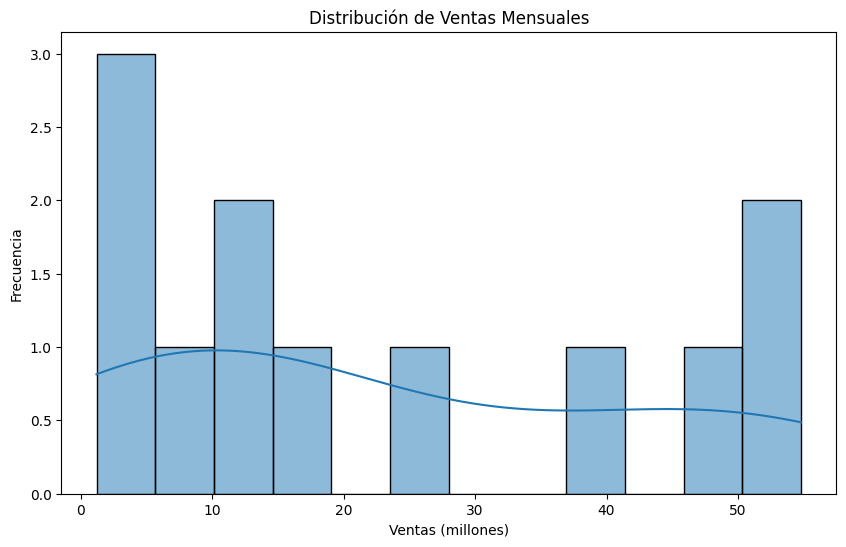

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(ventas_pp, kde=True, bins=12)
plt.title('Distribución de Ventas Mensuales')
plt.xlabel('Ventas (millones)')
plt.ylabel('Frecuencia')
plt.show()

Teorizá a partir de las dos actividades:  
Si tuvieras que adivinar de qué producto se trata,   

¿cuál crees que se ajusta más a los valores obtenidos? Justificá tu elección.  
[ ] Leche  
[ ] Bufanda  
[ ] Árbol de navidad  
[ ] Kit de geometría escolar  
[ ] Bronceador  


El aumento de las ventas entre mayo y agosto sugiere una venta estacional.  
Coincidiendo con el invierno en el hemisferio Sur. Lo cual podria ser por ej: "Bufandas"    
Como no conocemos la procedencia de los datos, podria ser ventas de verano en el hemisferio Norte y corresponder por ej: "Bronceador"